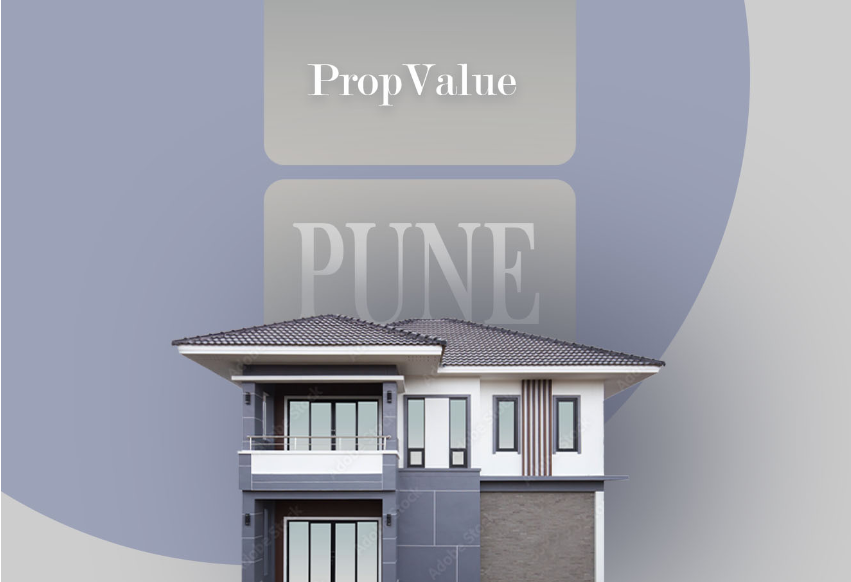

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
%matplotlib inline
import seaborn as sns

In [2]:
df1=pd.read_csv("Pune house data.csv")
df1.head()

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,19-Dec,2 BHK,Coomee,1056,2.0,1.0,39.07,Alandi Road
1,Plot Area,Ready To Move,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Ambegaon Budruk
2,Built-up Area,Ready To Move,3 BHK,NaN,1440,2.0,3.0,62.00,Anandnagar
3,Super built-up Area,Ready To Move,3 BHK,Soiewre,1521,3.0,1.0,95.00,Aundh
4,Super built-up Area,Ready To Move,2 BHK,NaN,1200,2.0,1.0,51.00,Aundh Road


## EDA

In [3]:
df1.shape

(13320, 9)

In [4]:
df1.columns

Index(['area_type', 'availability', 'size', 'society', 'total_sqft', 'bath',
       'balcony', 'price', 'site_location'],
      dtype='object')

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area_type      13320 non-null  object 
 1   availability   13320 non-null  object 
 2   size           13304 non-null  object 
 3   society        7818 non-null   object 
 4   total_sqft     13320 non-null  object 
 5   bath           13247 non-null  float64
 6   balcony        12711 non-null  float64
 7   price          13320 non-null  float64
 8   site_location  13319 non-null  object 
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
df1.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [7]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
bath,13247.0,2.692610,1.341458,1.0,2.0,2.0,3.0,40.0
balcony,12711.0,1.584376,0.817263,0.0,1.0,2.0,2.0,3.0
price,13320.0,112.565627,148.971674,8.0,50.0,72.0,120.0,3600.0


In [8]:
df1.isnull()

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
13315,False,False,False,False,False,False,False,False,False
13316,False,False,False,True,False,False,True,False,False
13317,False,False,False,False,False,False,False,False,False
13318,False,False,False,False,False,False,False,False,False


In [9]:
df1.isnull().sum()

area_type           0
availability        0
size               16
society          5502
total_sqft          0
bath               73
balcony           609
price               0
site_location       1
dtype: int64

In [10]:
df1['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [11]:
#Grouping by area type
df1.groupby("area_type")["area_type"].agg("count")


area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

## Data Visualization

<AxesSubplot:>

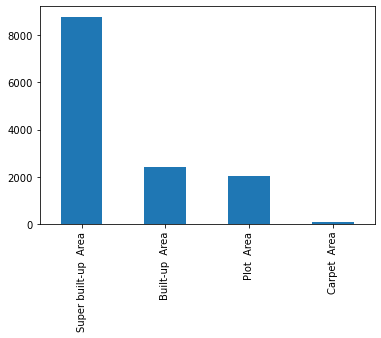

In [12]:
df1.area_type.value_counts().plot(kind='bar')

In [13]:
df1['bath'].unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9., nan,  8.,  7., 11., 10., 14.,
       27., 12., 16., 40., 15., 13., 18.])

<AxesSubplot:>

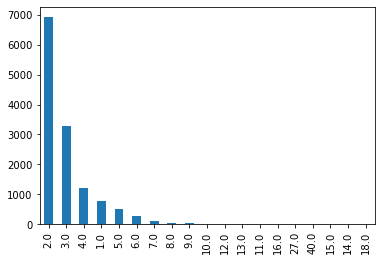

In [14]:
df1.bath.value_counts().plot(kind='bar')

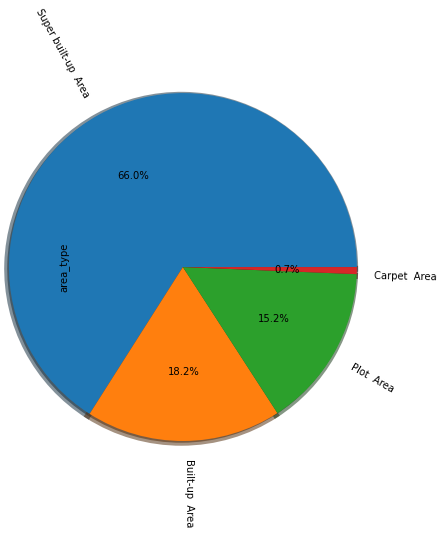

In [15]:
(df1["area_type"].value_counts()).plot.pie(autopct="%.1f%%", shadow=True,rotatelabels=True, wedgeprops={'linewidth': 6}, radius=2)
plt.show()

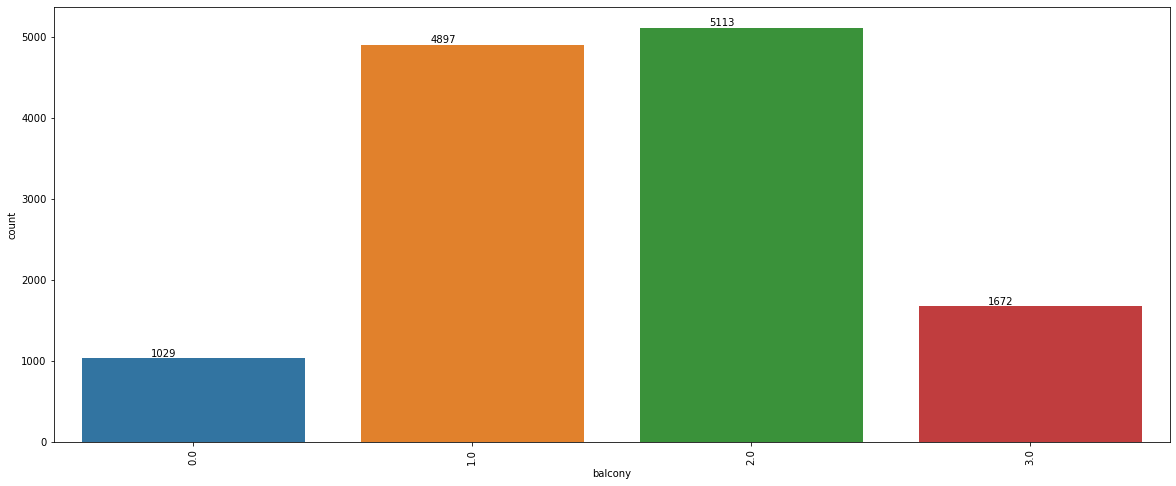

In [16]:
plt.figure(figsize = (20,8))
ax=sns.countplot(x = 'balcony', data = df1)
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va = 'bottom', color = 'black')

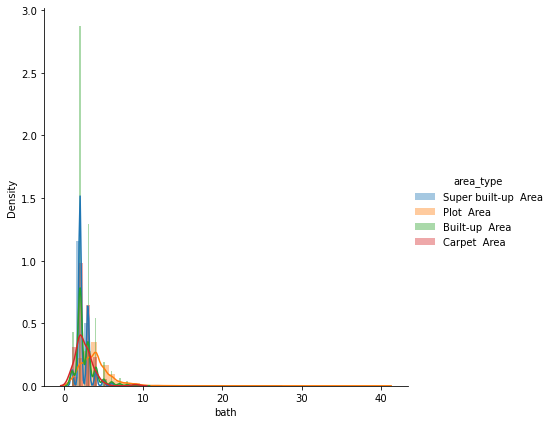

In [17]:
import warnings
warnings.filterwarnings('ignore')

sns.FacetGrid(df1, hue='area_type', height=6).map(sns.distplot, 'bath').add_legend()
plt.show()

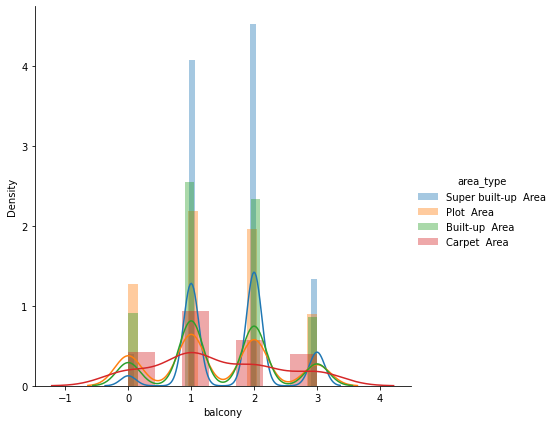

In [18]:
sns.FacetGrid(df1, hue='area_type', height=6).map(sns.distplot, 'balcony').add_legend()
plt.show()

- removing less significant features

In [20]:
df2 = df1.drop(["area_type", "society","balcony", "availability"], axis = "columns")

In [21]:
df2.shape

(13320, 5)

- removing null values

In [22]:
df2 = df2.dropna()

In [23]:
df2.isnull().sum()

size             0
total_sqft       0
bath             0
price            0
site_location    0
dtype: int64

In [24]:
df2.shape

(13246, 5)

## Feature Engineering

In [26]:
df2["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

- Bedrooms are represented by 2 ways -'BHK','Bedroom', lets make new column BHK and delete all units

In [28]:
df2['BHK'] = df2["size"].apply(lambda x: int(x.split(" ")[0]))

In [29]:
df2.head()

,size,total_sqft,bath,price,site_location,BHK
0,2 BHK,1056,2.0,39.07,Alandi Road,2
1,4 Bedroom,2600,5.0,120.00,Ambegaon Budruk,4
2,3 BHK,1440,2.0,62.00,Anandnagar,3
3,3 BHK,1521,3.0,95.00,Aundh,3
4,2 BHK,1200,2.0,51.00,Aundh Road,2


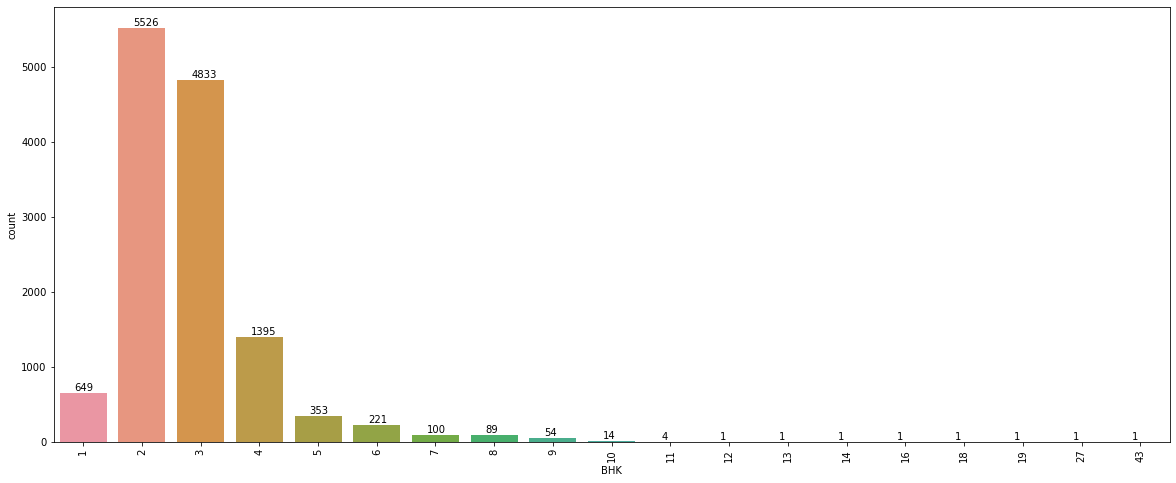

In [30]:
plt.figure(figsize = (20,8))
ax=sns.countplot(x = 'BHK', data = df2)
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va = 'bottom', color = 'black')

In [31]:
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

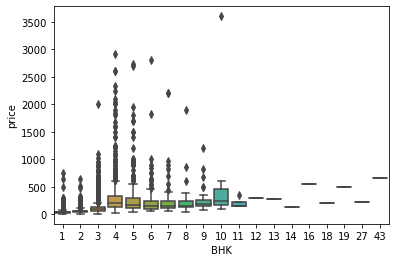

In [32]:
sns.boxplot(x = 'BHK', y = 'price', data = df2)
plt.show()

In [33]:
#Total sqft sathi
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [34]:
df2[~df2["total_sqft"].apply(is_float)].head(10)

,size,total_sqft,bath,price,site_location,BHK
30,4 BHK,2100 - 2850,4.0,186.000,Gultekdi,4
122,4 BHK,3067 - 8156,4.0,477.000,Ganeshkhind,4
137,2 BHK,1042 - 1105,2.0,54.005,Khadaki,2
165,2 BHK,1145 - 1340,2.0,43.490,Prabhat Road,2
188,2 BHK,1015 - 1540,2.0,56.800,Wakadewadi,2
410,1 BHK,34.46Sq. Meter,1.0,18.500,Ganeshkhind,1
549,2 BHK,1195 - 1440,2.0,63.770,Prabhat Road,2
648,9 Bedroom,4125Perch,9.0,265.000,Raviwar Peth,9
661,2 BHK,1120 - 1145,2.0,48.130,Tilak Road,2
672,4 Bedroom,3090 - 5002,4.0,445.000,Alandi Road,4


- Some places have a range in square feet, while in some places it is mentioned with unit, lets covert them all in numbers

In [36]:
def convert_sqft_to_number(x):
    tokens = x.split("-")
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [37]:
df2 = df2.copy()
df2["total_sqft"] = df2["total_sqft"].apply(convert_sqft_to_number)
df2.head(10)

,size,total_sqft,bath,price,site_location,BHK
0,2 BHK,1056.0,2.0,39.07,Alandi Road,2
1,4 Bedroom,2600.0,5.0,120.00,Ambegaon Budruk,4
2,3 BHK,1440.0,2.0,62.00,Anandnagar,3
3,3 BHK,1521.0,3.0,95.00,Aundh,3
4,2 BHK,1200.0,2.0,51.00,Aundh Road,2
5,2 BHK,1170.0,2.0,38.00,Balaji Nagar,2
6,4 BHK,2732.0,4.0,204.00,Baner,4
7,4 BHK,3300.0,4.0,600.00,Baner road,4
8,3 BHK,1310.0,3.0,63.25,Bhandarkar Road,3
9,6 Bedroom,1020.0,6.0,370.00,Bhavani Peth,6


- lets add new column price per sqft

In [39]:
df2 = df2.copy()
df2["price_per_sqft"] = df2["price"]*100000/df2["total_sqft"]
df2.head()

,size,total_sqft,bath,price,site_location,BHK,price_per_sqft
0,2 BHK,1056.0,2.0,39.07,Alandi Road,2,3699.810606
1,4 Bedroom,2600.0,5.0,120.00,Ambegaon Budruk,4,4615.384615
2,3 BHK,1440.0,2.0,62.00,Anandnagar,3,4305.555556
3,3 BHK,1521.0,3.0,95.00,Aundh,3,6245.890861
4,2 BHK,1200.0,2.0,51.00,Aundh Road,2,4250.000000


In [40]:
df2.location = df2.site_location.apply(lambda x: x.strip())
location_stats = df2['site_location'].value_counts(ascending=False)
location_stats

Alandi Road        139
Nana Peth          139
Pirangut           139
Paud Road          139
Parvati Darshan    139
                  ... 
Wakadewadi         136
Satara Road        136
Shukrawar Peth     136
Vadgaon Budruk     134
other                1
Name: site_location, Length: 97, dtype: int64

In [41]:
len(location_stats[location_stats<=10])

1

In [42]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

other    1
Name: site_location, dtype: int64

In [43]:
df2.location = df2.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df2.location.unique())

97

In [44]:
df2.head()

,size,total_sqft,bath,price,site_location,BHK,price_per_sqft
0,2 BHK,1056.0,2.0,39.07,Alandi Road,2,3699.810606
1,4 Bedroom,2600.0,5.0,120.00,Ambegaon Budruk,4,4615.384615
2,3 BHK,1440.0,2.0,62.00,Anandnagar,3,4305.555556
3,3 BHK,1521.0,3.0,95.00,Aundh,3,6245.890861
4,2 BHK,1200.0,2.0,51.00,Aundh Road,2,4250.000000


In [45]:
#Here we will discard some more data. Because, normally if a square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft

In [46]:
df2[df2.total_sqft/df2.BHK<300].head()

,size,total_sqft,bath,price,site_location,BHK,price_per_sqft
9,6 Bedroom,1020.0,6.0,370.0,Bhavani Peth,6,36274.509804
45,8 Bedroom,600.0,9.0,200.0,Kondhwa Budruk,8,33333.333333
58,6 Bedroom,1407.0,4.0,150.0,Mundhawa,6,10660.980810
68,8 Bedroom,1350.0,7.0,85.0,Pirangut,8,6296.296296
70,3 Bedroom,500.0,3.0,100.0,Pune Railway Station,3,20000.000000


In [47]:
df2 = df2[~(df2.total_sqft/df2.BHK<300)]
df2.shape

(12502, 7)

In [48]:
#Here we find that min price per sqft is 267 rs/sqft whereas max is 12000000, this shows a wide variation in property prices. We should remove outliers per location using mean and one Standard Deviation

In [49]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('site_location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (m - st)) & (subdf.price_per_sqft <= (m + st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

df2 = remove_pps_outliers(df2)
df2.shape


(10883, 7)

In [50]:
#Ploting the Scatter Chart for 2 BHK and 3 BHK properties

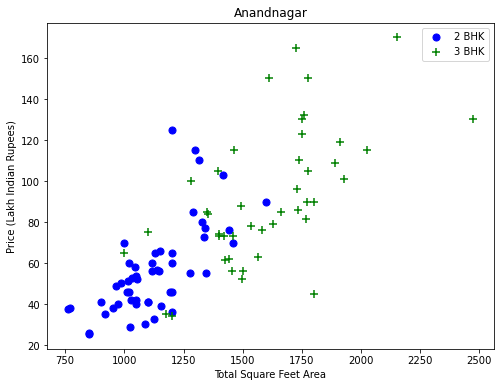

In [51]:
def plot_scatter_chart(df,location):
    bhk2 = df2[(df2.site_location==location) & (df2.BHK==2)]
    bhk3 = df2[(df2.site_location==location) & (df2.BHK==3)]
    matplotlib.rcParams['figure.figsize'] = (8,6)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df2,"Anandnagar")

Text(0, 0.5, 'Count')

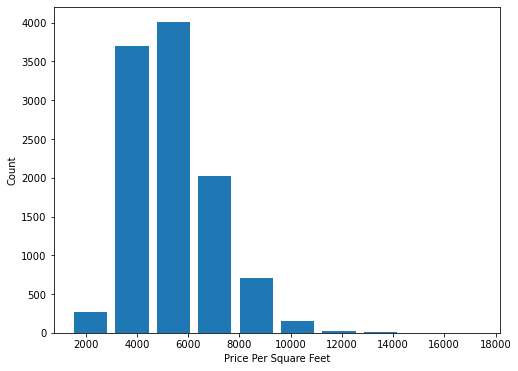

In [52]:
plt.hist(df2.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

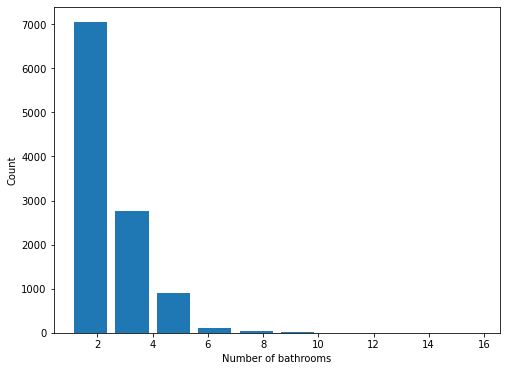

In [53]:
# No of Bathrooms
plt.hist(df2.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [54]:
df2[df2.bath>10]

,size,total_sqft,bath,price,site_location,BHK,price_per_sqft
1211,11 BHK,6000.0,12.0,150.0,Bibvewadi,11,2500.000000
2637,10 BHK,12000.0,12.0,525.0,Fatima Nagar,10,4375.000000
5265,13 BHK,5425.0,13.0,275.0,Kondhwa Khurd,13,5069.124424
6350,16 BHK,10000.0,16.0,550.0,Model colony,16,5500.000000
10389,10 BHK,4000.0,12.0,160.0,Wagholi,10,4000.000000


In [55]:
#It is unusual to have 2 more bathrooms than number of bedrooms in a home. So we are discarding that also.
df2[df2.bath>df2.BHK+2]

,size,total_sqft,bath,price,site_location,BHK,price_per_sqft
772,3 BHK,1806.0,6.0,116.0,Baner,3,6423.034330
3067,6 BHK,11338.0,9.0,1000.0,Ghorpade Peth,6,8819.897689
4231,4 Bedroom,7000.0,8.0,450.0,Karve Nagar,4,6428.571429


In [56]:
df2.head()

,size,total_sqft,bath,price,site_location,BHK,price_per_sqft
0,2 BHK,1056.0,2.0,39.07,Alandi Road,2,3699.810606
1,4 Bedroom,2894.0,4.0,245.00,Alandi Road,4,8465.791292
2,2 BHK,1084.0,2.0,50.00,Alandi Road,2,4612.546125
3,2 BHK,1230.0,2.0,80.00,Alandi Road,2,6504.065041
4,3 BHK,1750.0,3.0,130.00,Alandi Road,3,7428.571429


In [57]:
dummies = pd.get_dummies(df2.site_location)
dummies.head()

,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,Balaji Nagar,Baner,Baner road,Bhandarkar Road,Bhavani Peth,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
df2 = pd.concat([df2,dummies],axis='columns')
df2.head()

,size,total_sqft,bath,price,site_location,BHK,price_per_sqft,Alandi Road,Ambegaon Budruk,Anandnagar,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,2 BHK,1056.0,2.0,39.07,Alandi Road,2,3699.810606,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4 Bedroom,2894.0,4.0,245.00,Alandi Road,4,8465.791292,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2 BHK,1084.0,2.0,50.00,Alandi Road,2,4612.546125,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2 BHK,1230.0,2.0,80.00,Alandi Road,2,6504.065041,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3 BHK,1750.0,3.0,130.00,Alandi Road,3,7428.571429,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
df2 = df2.drop('site_location',axis='columns')
df2.head()

,size,total_sqft,bath,price,BHK,price_per_sqft,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,2 BHK,1056.0,2.0,39.07,2,3699.810606,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4 Bedroom,2894.0,4.0,245.00,4,8465.791292,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2 BHK,1084.0,2.0,50.00,2,4612.546125,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2 BHK,1230.0,2.0,80.00,2,6504.065041,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3 BHK,1750.0,3.0,130.00,3,7428.571429,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
X = df2.drop(['price'],axis='columns')
X.head()

,size,total_sqft,bath,BHK,price_per_sqft,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,2 BHK,1056.0,2.0,2,3699.810606,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4 Bedroom,2894.0,4.0,4,8465.791292,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2 BHK,1084.0,2.0,2,4612.546125,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2 BHK,1230.0,2.0,2,6504.065041,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3 BHK,1750.0,3.0,3,7428.571429,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
y = df2.price
y.head()

0     39.07
1    245.00
2     50.00
3     80.00
4    130.00
Name: price, dtype: float64

In [62]:
X = X.drop(['size'],axis='columns')
X.head()

,total_sqft,bath,BHK,price_per_sqft,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,Balaji Nagar,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,1056.0,2.0,2,3699.810606,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2894.0,4.0,4,8465.791292,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1084.0,2.0,2,4612.546125,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1230.0,2.0,2,6504.065041,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1750.0,3.0,3,7428.571429,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
X = X.drop(['price_per_sqft'],axis='columns')
X.head()

,total_sqft,bath,BHK,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,Balaji Nagar,Baner,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,1056.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2894.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1084.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1230.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1750.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
X.shape

(10883, 99)

In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [67]:
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.7606300108634568

In [68]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.77972216, 0.78060762, 0.75555984, 0.87088465, 0.84597033])

In [69]:
#Here we are using Grid Search CV for 3 different types of Regression models:

# 1. Linear Regression

# 2. Lasso Regression

# 3. Decision Tree Regression

In [70]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [71]:
find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.806563,{'normalize': True}
1,lasso,0.804404,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.713079,"{'criterion': 'mse', 'splitter': 'random'}"


In [72]:
#Model Testing
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [73]:
predict_price('Alandi Road',1000, 2, 2)

54.17424774169922

In [74]:
predict_price('Tilak Road',1050, 2, 1)

61.455955505371094

In [75]:
predict_price('Vadgaon Budruk',550, 1, 1)

17.655988693237305

In [76]:
predict_price('Yerawada',1508, 3, 2)

90.21956443786621

In [79]:
import pickle
with open('Pune_home_prices_model.pickle','wb')as f:
    pickle.dump(lr_clf,f)

In [81]:
# Columns che pan details lagtayet tyala json madhe transfer karu
import json
columns = {
    'data_columns':[col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))